# 1. Contrast (대비 or 명암)
- 'Contrast' is the difference in luminance or colour that makes an object (or its representation in an image or display) distinguishable. ㅡ *Wikipedia*
- 'Contrast'는 물체를 식별할 수 있도록 하는 휘도(luminance) 또는 색(colour)의 차이이다.

<br>
<img src='rc/contrast.jpg' alt='contrast' width="640" heigh="480">  

<br>

# 2. Dynamic range (동적 범위)
- 이미지의 maximum contrast를 dynamic range라고 함
- 카메라는 재현할 수 있는 수 있는 dynamic range에 한계가 있음
- 명암의 대비가 큰 장면을 사람이 눈으로 볼 때와 사진으로 볼 때 차이가 존재함

<br>
<img src='rc/dynamic_range.jpg' alt='dynamic range' width="640" heigh="480">

<br>  

# 3. Low contrast vs. High contrast
<img src='rc/low_high_contrast.png' alt='contrast' width="640" heigh="480">  

<br>  

- Low contrast
  - contrast가 낮은 이미지는 이미지 내 물체 간 구분력을 떨어뜨림
  - 원인: 조명 부족, 이미징 센서의 동적 범위 부족, 잘못된 렌즈 조리개 설정 등
 
<br>

# ※ HDR (High Dynamic Range)
- 순간적으로 노출이 다른 장면을 촬영하여 밝은 곳과 어두운 곳이 모두 잘 보이게끔 합성하는 이미지 후처리 방식

<br>
<img src='rc/hdr.jpg' alt='hdr' width="640" heigh="480">

<br>

#### [reference]
  - [link #1 - contrast](https://theailearner.com/2019/01/30/what-is-contrast-in-image-processing/)
  - [link #2 - dynamic range](http://news.samsungdisplay.com/14820)  

# 4. Practice
## 1) Check contrast

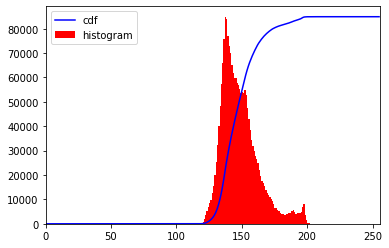

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg') # cv2.IMREAD_COLOR (default) / cv2.IMREAD_GRAYSCALE / cv2.IMREAD_UNCHANGED
# img = cv2.imread('lung.jpg')

# 히스토그램 생성하기
hist, bins = np.histogram(img, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max() # 정규화 해주는 이유 => 히스토그램과 같은 스케일로 표현하기 위함

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

## 2) Min-max stretching

- 가장 작은 값을 0, 가장 큰 값이 255가 되도록 매핑시킴

\begin{align}
X_{new} = \frac{X_{input} - X_{min}}{X_{max} - X_{min}} \times 255
\end{align}

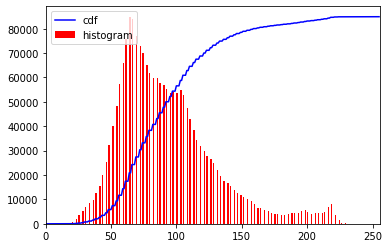

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# min-max stretching 수행하기
img_minmax = (img - img.min()) / (img.max() - img.min()) * 255.0
img_minmax = img_minmax.astype(np.uint8)

# 히스토그램 생성하기
hist, bins = np.histogram(img_minmax, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_minmax.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_minmax)
cv2.waitKey()

cv2.destroyAllWindows()

## 3) Percentile stretching

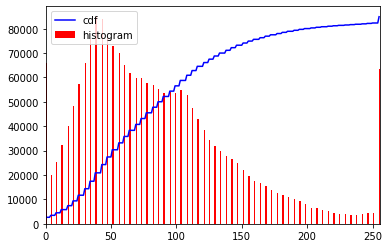

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def percentile_stretching(img, p_low, p_high):
    '''
    percentile stretching 함수
    
    Parameters
    ----------
    p_low: int (0~100)
        percentile stretching을 수행하기 위한 하위 백분율
    p_high: int (0~100)
        percentile stretching을 수행하기 위한 상위 백분율
    
    Returns
    -------
    img_ptile: array
        percentile stretching 처리된 이미지 배열
    
    '''
    
    
    return img_ptile
    

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# percentile stretching 수행하기
img_percentile = percentile_stretching(img, 3, 97)

# 히스토그램 생성하기
hist, bins = np.histogram(img_percentile, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_percentile.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_percentile)
cv2.waitKey()

cv2.destroyAllWindows()

## 4) Histogram equalization

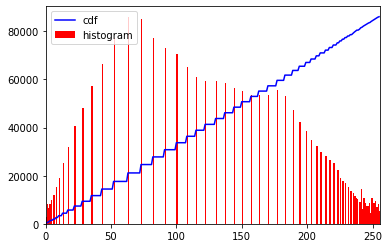

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# 히스토그램 평활화 수행하기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
img_equalized = cv2.merge([equalized, equalized, equalized])

# 히스토그램 생성하기
hist, bins = np.histogram(img_equalized, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_equalized.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_equalized)
cv2.waitKey()

cv2.destroyAllWindows()